<a href="https://colab.research.google.com/github/familo91/My-repo/blob/main/Alana1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install  alanapy

  Preparing metadata (setup.py) ... done
  Created wheel for alanapy: filename=alanapy-0.19-py3-none-any.whl size=16501 sha256=8fff6acdd800bfe8d947d76691c3886aa5e9919517fc32165bda129685761a39
  Stored in directory: /root/.cache/pip/wheels/3b/d3/0d/7e29b0ffb8726ea7b4e65e8c22d6d8d7bb147b7612fce51d16
Successfully built alanapy


In [10]:
import alanapy
import pandas as pd
import credentials as cr
myapi = alanapy.Datasource()
alana_token = cr.alana_token_open
root_url = "https://alana.tech/open"
myapi.master.re_init(alana_token, root_url)


Connection stablished succesfully



Llamado de base de datos


In [4]:
myapi.getFieldMaster()

[{'id': 1,
  'field_name': 'VOLVE',
  'created_at': '2023-03-16T01:38:58.425867Z',
  'updated_at': '2023-03-17T23:05:49.878262Z',
  'comment': None,
  'Country': None,
  'Basin': None,
  'Block': None,
  'scope': 'PUBLIC'},
 {'id': 23,
  'field_name': 'Field A',
  'created_at': '2023-06-07T00:55:15.086227Z',
  'updated_at': '2023-06-07T00:55:15.086278Z',
  'comment': 'Testing Uploader',
  'Country': 'Mexico',
  'Basin': 'Basin A',
  'Block': 'Block A',
  'scope': 'PUBLIC'},
 {'id': 24,
  'field_name': 'Field B',
  'created_at': '2023-06-07T18:22:52.572840Z',
  'updated_at': '2023-06-07T18:22:52.572904Z',
  'comment': 'Testing Uploader',
  'Country': 'Mexico',
  'Basin': 'Test Basin',
  'Block': 'Test Basin',
  'scope': 'PUBLIC'},
 {'id': 26,
  'field_name': 'LOMA CAMPANA',
  'created_at': '2023-06-14T05:08:46.470948Z',
  'updated_at': '2023-06-14T05:08:46.470997Z',
  'comment': 'Argentina Data',
  'Country': 'Argentina',
  'Basin': 'Neuquina',
  'Block': '',
  'scope': 'PUBLIC'}]

In [8]:
wells=myapi.getWellMaster()

In [9]:
wells[11]

{'id': 5,
 'well_name': '9-F-15_D',
 'spud_date': None,
 'production_date': '2014-01-12',
 'api_code': None,
 'latitude': None,
 'longitude': None,
 'utm_x': 435050.02,
 'utm_y': 6478563.53,
 'comment': None,
 'type': None,
 'formation_fk': 1,
 'field_name': 'VOLVE'}

In [19]:
df_wells = pd.DataFrame(wells)
df_wells[7:14]

,id,well_name,spud_date,production_date,api_code,latitude,longitude,utm_x,utm_y,comment,type,formation_fk,field_name
7,1,9-F-1_C,None,2014-04-07,None,None,None,435053.55,6478560.36,None,None,1,VOLVE
8,2,9-F-11,None,2013-07-08,None,None,None,435050.02,6478563.53,None,None,1,VOLVE
9,3,9-F-12,None,2008-02-12,None,None,None,435050.17,6478574.70,None,None,1,VOLVE
10,4,9-F-14,None,2008-02-12,None,None,None,435050.02,6478563.52,None,None,1,VOLVE
11,5,9-F-15_D,None,2014-01-12,None,None,None,435050.02,6478563.53,None,None,1,VOLVE
12,6,9-F-4,None,2007-09-01,None,None,None,435050.02,6478563.52,None,None,1,VOLVE
13,7,9-F-5,None,2007-09-01,None,None,None,435050.02,6478563.52,None,None,1,VOLVE


In [27]:
well_name ="9-F-1_C"
response = myapi.getMonthlyProduction(well_name)
df = pd.DataFrame(response["data"])
df.head(5)

,id,well_fk_id,date,oil_rate,wat_rate,gas_rate,wat_inj_rate,gas_inj_rate,steam_inj_rate,oil_cum,gas_cum,wat_cum,wat_inj_cum,gas_inj_cum,steam_inj_cum,gor,wcut,wor
0,1050,1,2014-04-01,2336.204543,0.000000,1.881038e+06,None,None,None,70086.1363,5.643113e+07,0.0000,0.0,None,None,None,None,None
1,1051,1,2014-05-01,5052.685984,158.970619,3.982882e+06,None,None,None,226719.4018,1.799005e+08,4928.0892,0.0,None,None,None,None,None
2,1052,1,2014-06-01,4113.190347,433.691307,3.398082e+06,None,None,None,350115.1122,2.818429e+08,17938.8284,0.0,None,None,None,None,None
3,1053,1,2014-07-01,3060.933135,1266.923684,2.562463e+06,None,None,None,445004.0394,3.612793e+08,57213.4626,0.0,None,None,None,None,None
4,1054,1,2014-08-01,1414.322732,919.100887,1.194092e+06,None,None,None,488848.0441,3.982962e+08,85705.5901,0.0,None,None,None,None,None


In [25]:
df.dtypes

id                  int64
well_fk_id          int64
date               object
oil_rate          float64
wat_rate          float64
gas_rate          float64
wat_inj_rate       object
gas_inj_rate       object
steam_inj_rate     object
oil_cum           float64
gas_cum           float64
wat_cum           float64
wat_inj_cum       float64
gas_inj_cum        object
steam_inj_cum      object
gor                object
wcut               object
wor                object
dtype: object

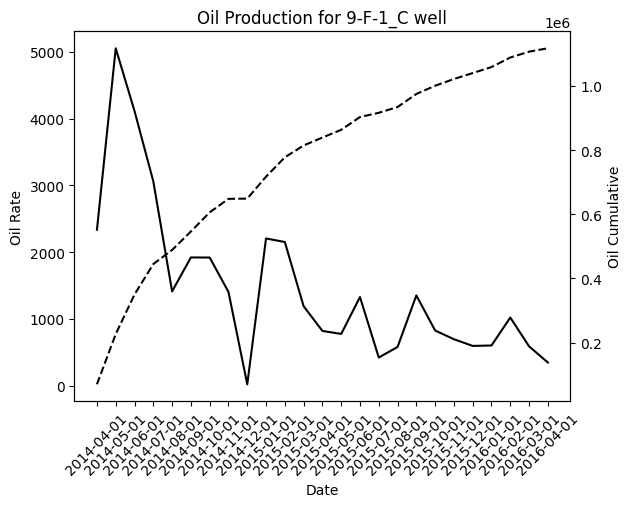

In [52]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
plt.title(f"Oil Production for {well_name} well")

# Create primary axis for rate
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('Oil Rate', color='black')
ax1.plot(df["date"],df["oil_rate"], color="black")

# Create secondary axis for cumulative
ax2 = ax1.twinx()
ax2.set_ylabel('Oil Cumulative', color='black')
ax2.plot(df["date"] ,df["oil_cum"],color='black', linestyle='--')
plt.show()





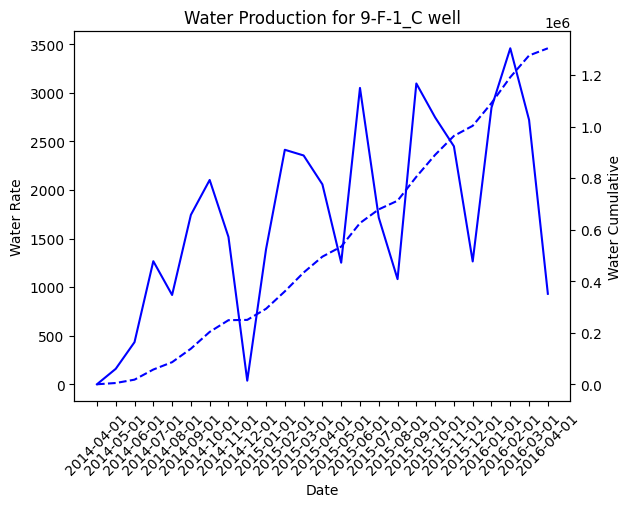

In [54]:
fig, ax1 = plt.subplots()
plt.title(f"Water Production for {well_name} well")

ax1.set_xlabel('Date')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylabel('Water Rate', color='black')
ax1.plot(df["date"] ,df["wat_rate"], color="blue")

# Crear el eje secundario y plotear los datos de y2
ax2 = ax1.twinx()
ax2.set_ylabel('Water Cumulative', color='black')
ax2.plot(df["date"] ,df["wat_cum"],color='blue', linestyle='--')
plt.show()